### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.
*Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



* Attribute Information:

* The explanations of sensor measurements and their brief statistics are given below.

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

### Import necessary library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

### Import dataset

In [2]:
turbine_data = pd.read_csv('gas_turbines.csv')
turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


### Initial Analysis

In [3]:
turbine_data.shape

(15039, 11)

In [4]:
turbine_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
turbine_data[turbine_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [6]:
turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
turbine_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


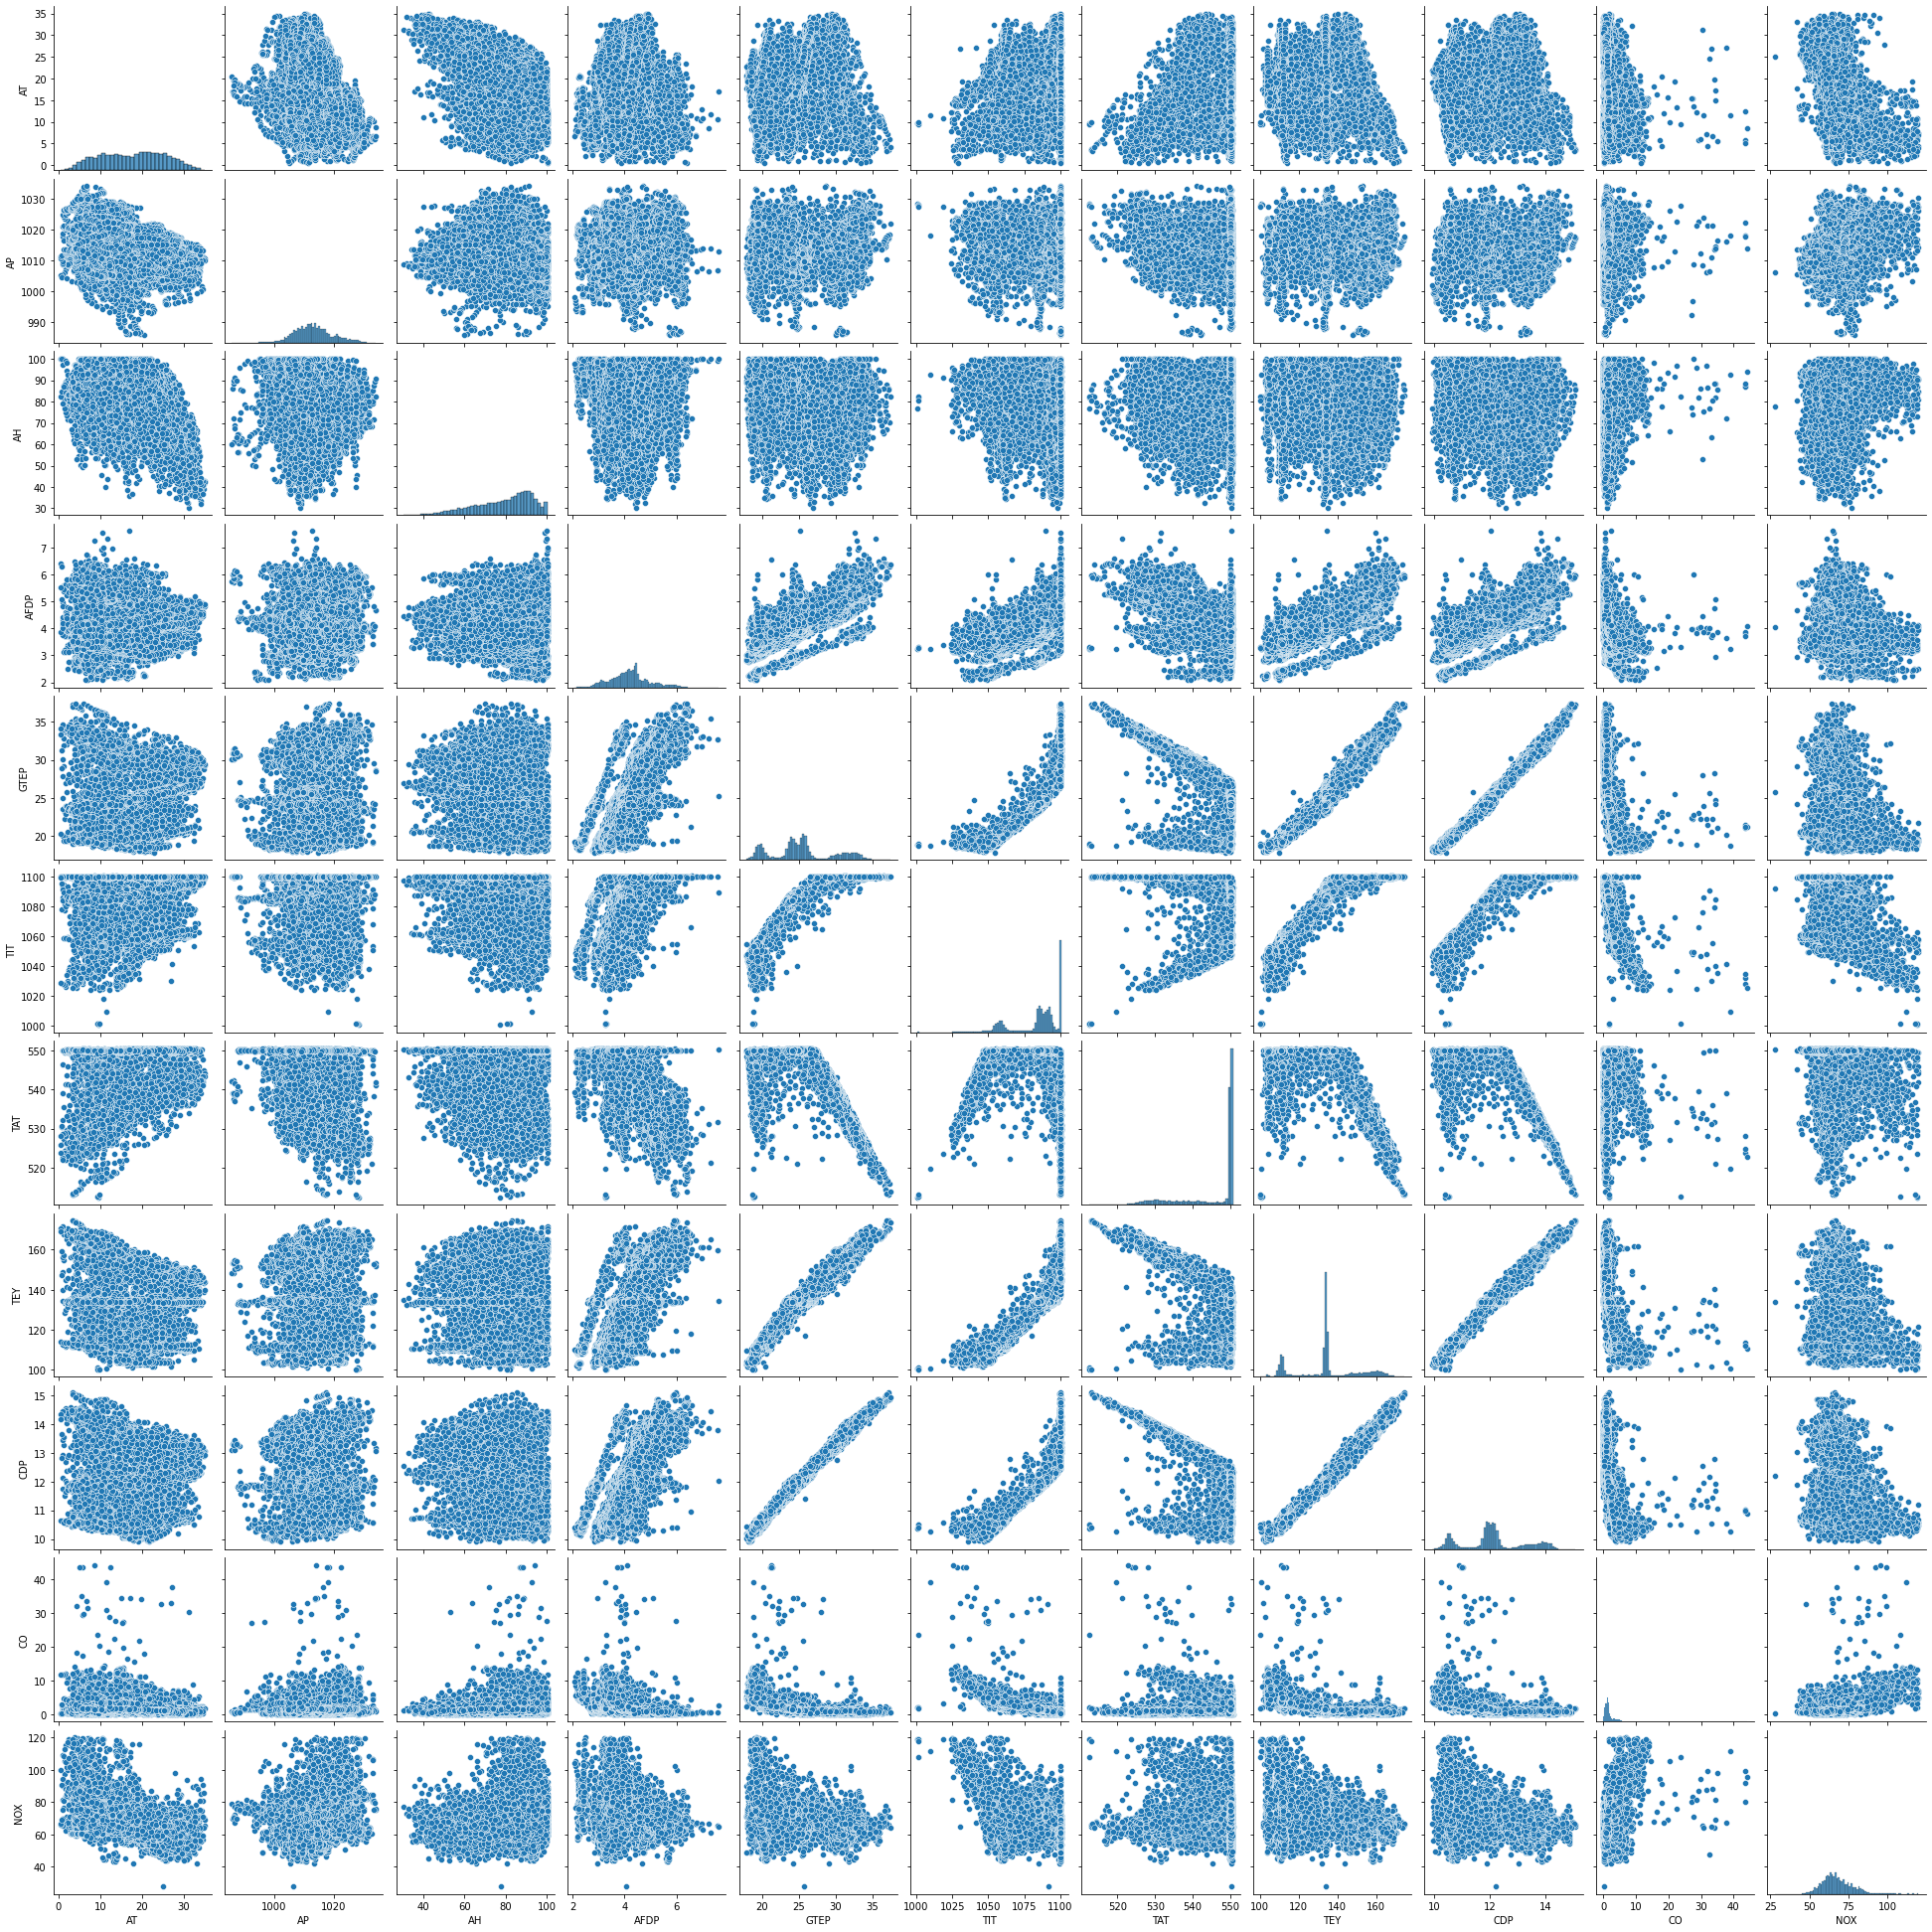

In [8]:
sns.pairplot(turbine_data)

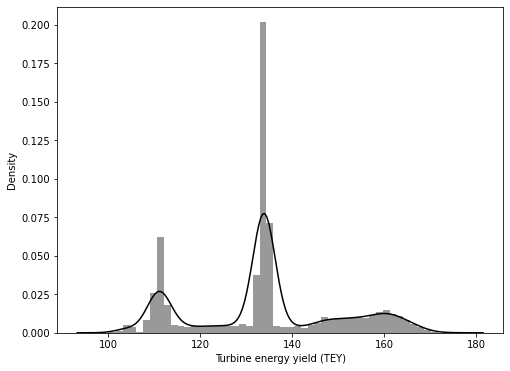

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['TEY'],axlabel='Turbine energy yield (TEY)',color='black')
plt.show()

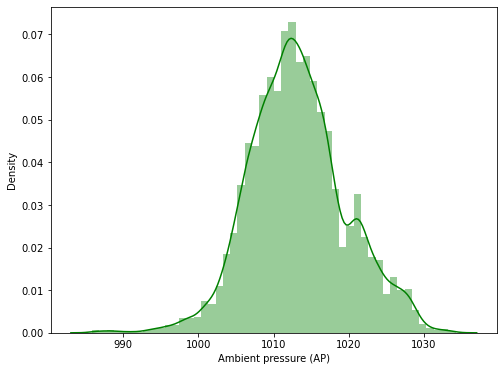

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['AP'],axlabel='Ambient pressure (AP)',color='green')
plt.show()

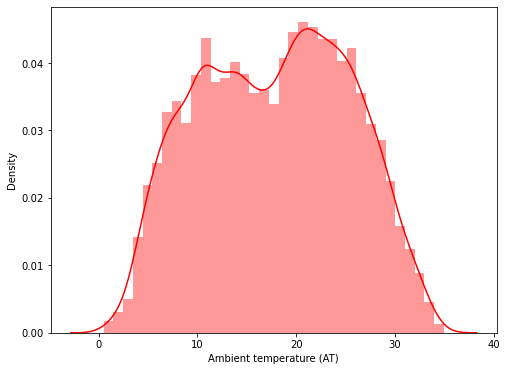

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['AT'],axlabel='Ambient temperature (AT)',color='red')
plt.show()

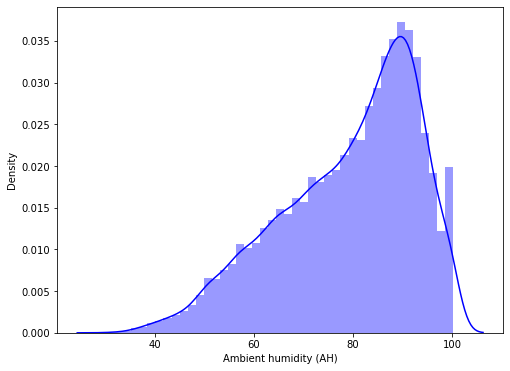

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['AH'],axlabel='Ambient humidity (AH)',color='blue')
plt.show()

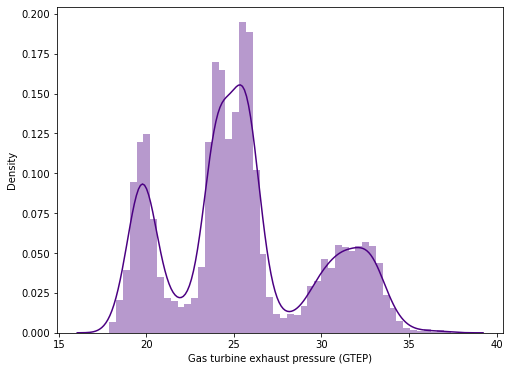

In [13]:
#Gas turbine exhaust pressure (GTEP) 
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['GTEP'],axlabel='Gas turbine exhaust pressure (GTEP)',color='indigo')
plt.show()

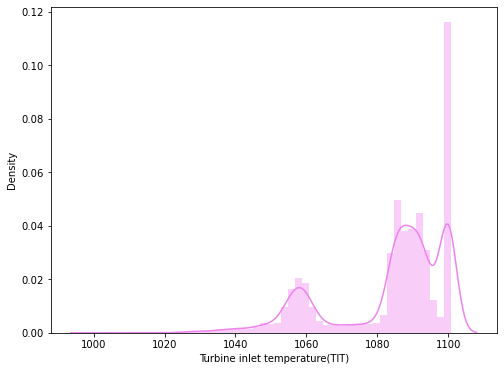

In [14]:
#Turbine inlet temperature (TIT)
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['TIT'],axlabel='Turbine inlet temperature(TIT)',color='violet')
plt.show()

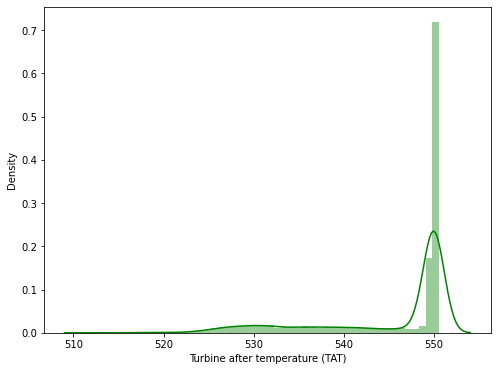

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['TAT'],axlabel='Turbine after temperature (TAT)',color='green')
plt.show()

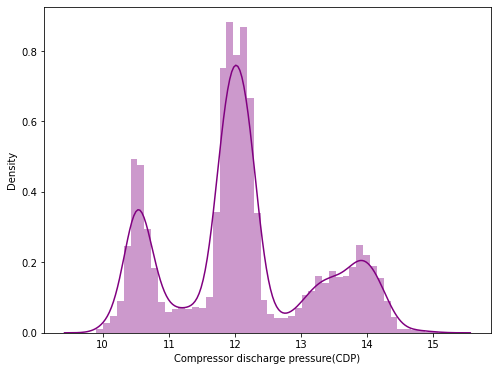

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['CDP'],axlabel='Compressor discharge pressure(CDP)',color='purple')
plt.show()

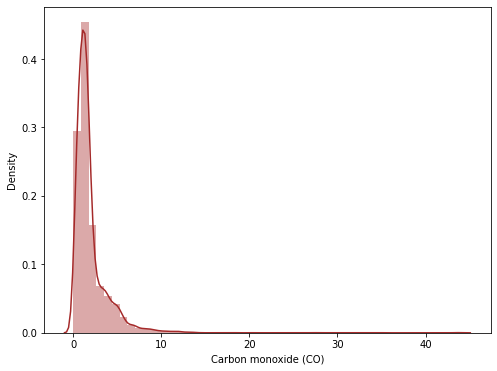

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['CO'],axlabel='Carbon monoxide (CO)',color='brown')
plt.show()

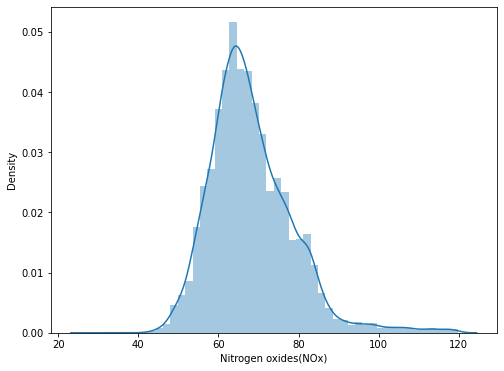

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(x = turbine_data['NOX'],axlabel='Nitrogen oxides(NOx)')
plt.show()

### Model Building

In [19]:
x = turbine_data.drop(labels='TEY',axis=1)
y = turbine_data[['TEY']]

In [20]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [21]:
y.head()

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72


### Covert input data in standard form

In [22]:
sclar = MinMaxScaler()
scale_data = sclar.fit_transform(x)
scale_data

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [23]:
x_train,x_test, y_train, y_test = train_test_split(scale_data,y,test_size=0.3,random_state=12)

In [24]:
x_train.shape,y_train.shape

((10527, 10), (10527, 1))

In [25]:
x_test.shape,y_test.shape

((4512, 10), (4512, 1))

### Model Training

#### Turning Hyperparameter: Batch Size and epochs

In [26]:
def regression_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))   #The Dropout layer randomly sets input units to 0 with a frequency of `rate` at each step during training time, which helps prevent overfitting.
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    
    oppti = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error',optimizer = oppti,metrics=['mae','mse'])
    return model
    

In [27]:
model1 = KerasRegressor(build_fn=regression_model, verbose=0)
batch_size = [10,50,100]
epochs = [40,70,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model1, param_grid=param_grid, cv = KFold(),verbose=5)
grid_res = gsv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......................batch_size=10, epochs=40; total time= 1.7min
[CV 2/5] END .......................batch_size=10, epochs=40; total time= 1.5min
[CV 3/5] END .......................batch_size=10, epochs=40; total time= 1.5min
[CV 4/5] END .......................batch_size=10, epochs=40; total time= 1.7min
[CV 5/5] END .......................batch_size=10, epochs=40; total time= 1.6min
[CV 1/5] END .......................batch_size=10, epochs=70; total time= 2.6min
[CV 2/5] END .......................batch_size=10, epochs=70; total time= 2.6min
[CV 3/5] END .......................batch_size=10, epochs=70; total time= 2.6min
[CV 4/5] END .......................batch_size=10, epochs=70; total time= 2.6min
[CV 5/5] END .......................batch_size=10, epochs=70; total time= 2.6min
[CV 1/5] END ......................batch_size=10, epochs=100; total time= 3.6min
[CV 2/5] END ......................batch_size=10,

In [28]:
print(grid_res.best_score_,grid_res.best_params_)

-17999.202734375 {'batch_size': 100, 'epochs': 40}


#### Turning Hyperparameter: Learning rate and Dropout rate

In [65]:
def regression_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

In [66]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator= model, param_grid=param_grid, cv=KFold() ,verbose=5)
grid_res = gsv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............dropout_rate=0.0, learning_rate=0.1; total time=  14.2s
[CV 2/5] END ............dropout_rate=0.0, learning_rate=0.1; total time=  15.5s
[CV 3/5] END ............dropout_rate=0.0, learning_rate=0.1; total time=  16.9s
[CV 4/5] END ............dropout_rate=0.0, learning_rate=0.1; total time=  15.1s
[CV 5/5] END ............dropout_rate=0.0, learning_rate=0.1; total time=  12.7s
[CV 1/5] END ...........dropout_rate=0.0, learning_rate=0.01; total time=  12.9s
[CV 2/5] END ...........dropout_rate=0.0, learning_rate=0.01; total time=  15.5s
[CV 3/5] END ...........dropout_rate=0.0, learning_rate=0.01; total time=  15.3s
[CV 4/5] END ...........dropout_rate=0.0, learning_rate=0.01; total time=  15.4s
[CV 5/5] END ...........dropout_rate=0.0, learning_rate=0.01; total time=  15.5s
[CV 1/5] END ..........dropout_rate=0.0, learning_rate=0.001; total time=  16.8s
[CV 2/5] END ..........dropout_rate=0.0, learning

In [35]:
print(grid_res.best_params_,grid_res.best_score_)

{'dropout_rate': 0.0, 'learning_rate': 0.1} -17999.202734375


#### Tuning of Hyperparameter :Activation Function & Kernel Initializer

In [37]:
def regression_model(activation_function,inti):
    model = Sequential()
    model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))   
    model.add(Dense(8 ,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'sigmoid'))
    adam = Adam(learning_rate=0.1)
    model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
    return model

In [38]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
activation_function = ['relu', 'tanh','softmax','linear']
inti = ['zero', 'uniform','normal']
param_grid = dict(activation_function = activation_function,inti = inti)
gsv_m = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose = 5)
grid_resu = gsv_m.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ............activation_function=relu, inti=zero; total time=  11.3s
[CV 2/5] END ............activation_function=relu, inti=zero; total time=  10.8s
[CV 3/5] END ............activation_function=relu, inti=zero; total time=  10.3s
[CV 4/5] END ............activation_function=relu, inti=zero; total time=  10.4s
[CV 5/5] END ............activation_function=relu, inti=zero; total time=  10.2s
[CV 1/5] END .........activation_function=relu, inti=uniform; total time=  12.5s
[CV 2/5] END .........activation_function=relu, inti=uniform; total time=  10.4s
[CV 3/5] END .........activation_function=relu, inti=uniform; total time=  10.5s
[CV 4/5] END .........activation_function=relu, inti=uniform; total time=  10.6s
[CV 5/5] END .........activation_function=relu, inti=uniform; total time=  10.2s
[CV 1/5] END ..........activation_function=relu, inti=normal; total time=  10.1s
[CV 2/5] END ..........activation_function=relu,

In [39]:
print(grid_resu.best_score_,grid_resu.best_params_)

-17999.202734375 {'activation_function': 'relu', 'inti': 'uniform'}


#### Tuning of Hyperparameter :Number of Neurons in hidden layer

In [50]:
def regression_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(8,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation= 'sigmoid'))
    adam = Adam(learning_rate= 0.1)
    model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae','mse'])
    return model

In [51]:
model = KerasRegressor(build_fn=regression_model,batch_size = 100,epochs = 40,verbose = 0)
neuron1 = [16,12,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2 = neuron2)
gsvp = GridSearchCV(estimator = model,param_grid = param_grid,cv=KFold(),verbose=5)
grid_result = gsvp.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........................neuron1=16, neuron2=12; total time=  11.1s
[CV 2/5] END .........................neuron1=16, neuron2=12; total time=  10.9s
[CV 3/5] END .........................neuron1=16, neuron2=12; total time=  10.2s
[CV 4/5] END .........................neuron1=16, neuron2=12; total time=  10.8s
[CV 5/5] END .........................neuron1=16, neuron2=12; total time=  10.5s
[CV 1/5] END ..........................neuron1=16, neuron2=8; total time=  10.3s
[CV 2/5] END ..........................neuron1=16, neuron2=8; total time=  10.3s
[CV 3/5] END ..........................neuron1=16, neuron2=8; total time=  10.3s
[CV 4/5] END ..........................neuron1=16, neuron2=8; total time=  10.3s
[CV 5/5] END ..........................neuron1=16, neuron2=8; total time=  10.4s
[CV 1/5] END ..........................neuron1=16, neuron2=4; total time=  10.2s
[CV 2/5] END ..........................neuron1=16

In [52]:
print(grid_result.best_score_,grid_result.best_params_)

-17999.202734375 {'neuron1': 16, 'neuron2': 12}


###  Train a model with optimum values of hyperparameter

In [54]:
# Best parametes
# batch_size: 100 
# epochs: 40
# dropout_rate: 0.0 
# learning_rate: 0.1
# activation_function: relu 
# inti: uniform
# neuron1: 16 
# neuron2: 12    

In [56]:
model = Sequential()
model.add(Dense(16,input_dim = 10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(12,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dropout(0.0))
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
optimizer = RMSprop(learning_rate=0.1)
model.compile(loss='mse',optimizer = optimizer,metrics=['mae','mse'])

In [57]:
model.fit(x_train,y_train,batch_size=100,epochs=40)
y_pred = model.predict(x_train)

Epoch 1/40
106/106 [==============================] - 2s 5ms/step - loss: 1015.9622 - mae: 25.9373 - mse: 1015.9622
Epoch 2/40
106/106 [==============================] - 1s 5ms/step - loss: 595.0725 - mae: 23.5709 - mse: 595.0725
Epoch 3/40
106/106 [==============================] - 1s 6ms/step - loss: 563.3316 - mae: 22.9829 - mse: 563.3316
Epoch 4/40
106/106 [==============================] - 1s 8ms/step - loss: 499.1760 - mae: 21.6522 - mse: 499.1760
Epoch 5/40
106/106 [==============================] - 1s 9ms/step - loss: 423.8819 - mae: 19.8876 - mse: 423.8819
Epoch 6/40
106/106 [==============================] - 1s 9ms/step - loss: 316.0902 - mae: 17.1238 - mse: 316.0902
Epoch 7/40
106/106 [==============================] - 1s 10ms/step - loss: 232.5235 - mae: 14.6888 - mse: 232.5235
Epoch 8/40
106/106 [==============================] - 1s 9ms/step - loss: 167.4099 - mae: 12.4416 - mse: 167.4099
Epoch 9/40
106/106 [==============================] - 1s 13ms/step - loss: 124.5546 -

In [58]:
model.summary()

Model: "sequential_384"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1152 (Dense)          (None, 16)                176       
                                                                 
 dropout_768 (Dropout)       (None, 16)                0         
                                                                 
 dense_1153 (Dense)          (None, 12)                204       
                                                                 
 dropout_769 (Dropout)       (None, 12)                0         
                                                                 
 dense_1154 (Dense)          (None, 1)                 13        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [59]:
mean_absolute_error(y_train,y_pred)

4.381780963476265

In [60]:
mean_squared_error(y_train,y_pred)

24.67926725518046

In [61]:
# testing data
test_score = model.evaluate(x_test,y_test)

141/141 [==============================] - 1s 4ms/step - loss: 25.1110 - mae: 4.3919 - mse: 25.1110


In [62]:
y_test_pred = model.predict(x_test)

In [63]:
mean_absolute_error(y_test,y_test_pred)

4.391932232498277

In [64]:
mean_squared_error(y_test,y_test_pred)

25.11104097533481